# 1

data1 是40名癌症病人的一些生存资料，其中，X1表示生活行动能力评分（1~100），X2表示病人的年龄，X3表示由诊断到直入研究时间（月）；X4表示肿瘤类型，X5把ISO两种疗法（“1”是常规，“0”是试验新疗法）；Y表示病人生存时间（“0”表示生存时间小于200天，“1”表示生存时间大于或等于200天）

试建立Y关于X1~X5的logistic回归模型

In [2]:
# -*- coding: utf-8 -*-
#逻辑回归 自动建模
import pandas as pd
import os

In [6]:
#参数初始化
o =os.getcwd()
filename = o+"\\data1.txt"
data = pd.read_table(filename,encoding="gbk")
data.head()

,序号,X1,X2,X3,X4,X5,Y
0,1,70,64,5,1,1,1
1,2,60,63,9,1,1,0
2,3,70,65,11,1,1,0
3,4,40,69,10,1,1,0
4,5,40,63,58,1,1,0


In [8]:
x = data.iloc[:,1:5].as_matrix() #前8行作为自变量
y = data.iloc[:,6].as_matrix()#最后一行最为因变量
y

In [10]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR 
rlr = RLR() #建立随机逻辑回归模型，筛选变量
rlr.fit(x, y) #训练模型
rlr.get_support() #获取特征筛选结果，也可以通过.scores_方法获取各个特征的分数
print(u'通过随机逻辑回归模型筛选特征结束。')
# print(u'有效特征为：%s' % ','.join(data.columns[rlr.get_support()]))

print(u'有效特征为：%s' % ','.join(data.iloc[:,1:5].columns[rlr.get_support()]))

lr = LR() #建立逻辑回归模型
lr.fit(x, y) #用筛选后的特征数据来训练模型
print(u'逻辑回归模型训练结束。')
print(u'模型的平均正确率为：%s' % lr.score(x, y)) #给出模型的平均正确率，本例为85%

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


通过随机逻辑回归模型筛选特征结束。
有效特征为：
逻辑回归模型训练结束。
模型的平均正确率为：0.85


# 2

data2 是关于重伤病人的一些基本资料。自变量X是病人的住院天数，因变量Y是病人出院后长期恢复的预后指数，指数数值越大表示预后结局越好。

尝试对数据拟合合适的线性或非线性模型

In [34]:
filename2 = o+"\\data2.txt"
data = pd.read_table(filename2,encoding="gbk")
data.head()

,序号,X,Y
0,1,2,54
1,2,5,50
2,3,7,45
3,4,10,37
4,5,14,35


In [24]:
x = pd.DataFrame(data["X"]) #前8行作为自变量
y = pd.DataFrame(data["Y"])#最后一行最为因变量
x

,X
0,2
1,5
2,7
3,10
4,14
5,19
6,26
7,31
8,34
9,38


## 非线性模型

Coefficients: 
 [[-0.752508]]
MSE: 30.079636195912244
Variance score: 0.89


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


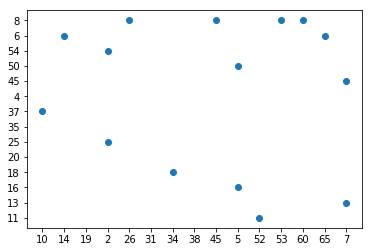

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y)
fig.show()

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x,y)

# The coefficients
print('Coefficients: \n', linreg.coef_)

y_pred = linreg.predict(x)
# The mean square error
print ("MSE:",metrics.mean_squared_error(y,y_pred))

# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % linreg.score(x, y))

# 线性模型

In [27]:
import seaborn as sns
import matplotlib
import pandas as pd
from numpy import *

In [35]:
data = {"x":data["X"],
       "y":data["Y"]}
data = pd.DataFrame(data)
data

,x,y
0,2,54
1,5,50
2,7,45
3,10,37
4,14,35
5,19,25
6,26,20
7,31,16
8,34,18
9,38,13


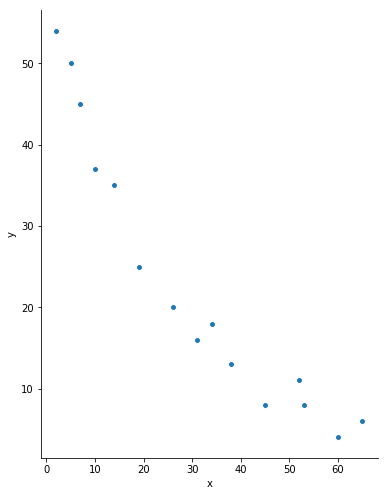

In [36]:
%matplotlib inline
sns.pairplot(data, x_vars='x', y_vars='y', size=7, aspect=0.8)

In [37]:
x = data['x'].reshape(-1,1) #-1 == all
y = data['y'].reshape(-1, 1)
x

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


array([[ 2],
       [ 5],
       [ 7],
       [10],
       [14],
       [19],
       [26],
       [31],
       [34],
       [38],
       [45],
       [52],
       [53],
       [60],
       [65]], dtype=int64)

In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(x,y)

print (linreg.intercept_)
print (linreg.coef_)

[46.46041252]
[[-0.752508]]


In [46]:
print("Y关于X的一元线性方程")
print(u"y = %s"%linreg.coef_ +"x + %s"%linreg.intercept_)

Y关于X的一元线性方程
y = [[-0.752508]]x + [46.46041252]
